In [1]:
# libraries
import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
from sklearn.linear_model import Perceptron

In [3]:
# copied from book cause figures do look good
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# Perceptron


In [4]:
# loading the data
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 0  # binary classification for Setosa only

pcf = Perceptron(random_state=42)  # not tweaking anything  rn
pcf.fit(X, y)
X_new = [[2, 0.3], [3, 0.9]]
y_pred = pcf.predict(X_new)
y_pred

array([ True, False])

# Perceptron is kinda like SGDclassifier but with some params tweaked


In [5]:
from sklearn.linear_model import SGDClassifier

pcf_clone = SGDClassifier(
    loss="perceptron", learning_rate="constant", eta0=1, penalty=None, random_state=42
)
pcf_clone.fit(X, y)
pcf_clone.predict(X_new)

array([ True, False])

In [6]:
# now checking on some other inputs as well
# EXERCISES

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
housing = fetch_california_housing()
X_tr, X_ts, y_tr, y_ts = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_val, Y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

In [9]:
ml_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), ml_reg)
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [10]:
# preds
y_pred = pipeline.predict(X_val)
error = mean_squared_error(y_val, y_pred, squared=False)
error

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.505332665796838

# MLP calssifier


In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
X_tr_ir, X_ts_ir, y_tr_ir, y_ts_ir = train_test_split(
    iris.data, iris.target, random_state=42
)
X_train_ir, X_val_ir, Y_train_ir, y_val_ir = train_test_split(
    X_tr_ir, y_tr_ir, random_state=42
)

In [13]:
ml_clf = MLPClassifier(hidden_layer_sizes=[8], max_iter=10000, random_state=42)
pipeline = make_pipeline(StandardScaler(), ml_clf)
pipeline.fit(X_train_ir, Y_train_ir)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=[8], max_iter=10000,
                               random_state=42))])

In [14]:
y_pred_ir = pipeline.predict(X_val_ir)
score = pipeline.score(X_val_ir, y_pred_ir)
score

1.0

# Implementation with keras


In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, Y_train_full), (X_test, y_test) = fashion_mnist

In [16]:
X_train, Y_train = X_train_full[:-5000], Y_train_full[:-5000]
Xval, yval = X_train_full[-5000:], Y_train_full[-5000:]

(-0.5, 27.5, 27.5, -0.5)

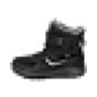

In [17]:
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")

In [18]:
X_train.dtype

dtype('uint8')

In [19]:
# conversion to float
X_train, Xval, X_test = X_train / 225.0, Xval / 225.0, X_test / 225.0

In [20]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [21]:
class_names[Y_train[0]]

'Ankle boot'

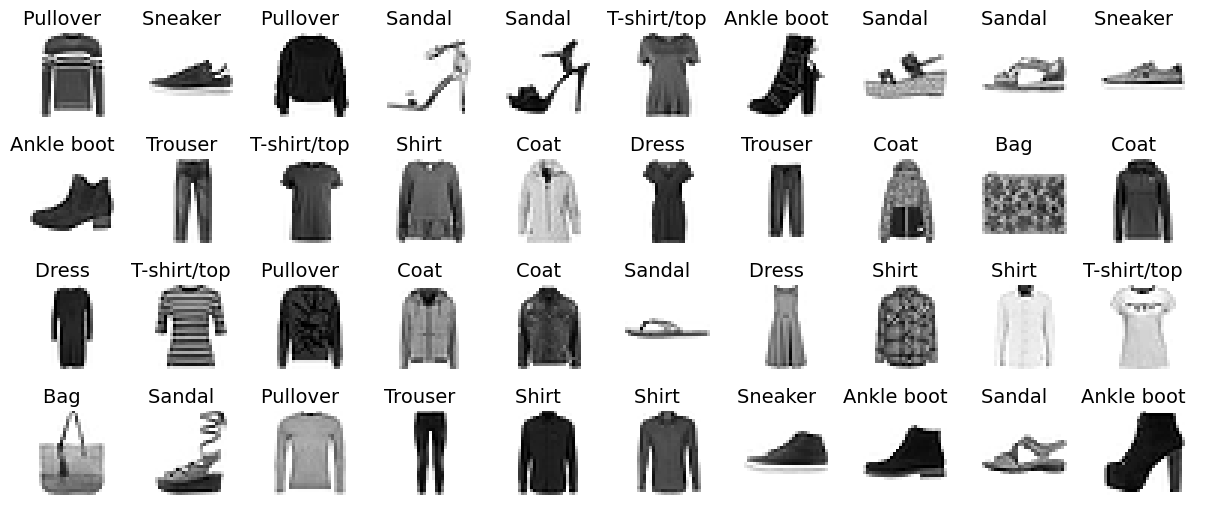

In [22]:
# plotting randomly

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index + 5], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[Y_train[index + 5]] + "   ")
plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [23]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

In [24]:
# creating a model using KERAS
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [25]:
# extra code – clear the session to reset the name counters

tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

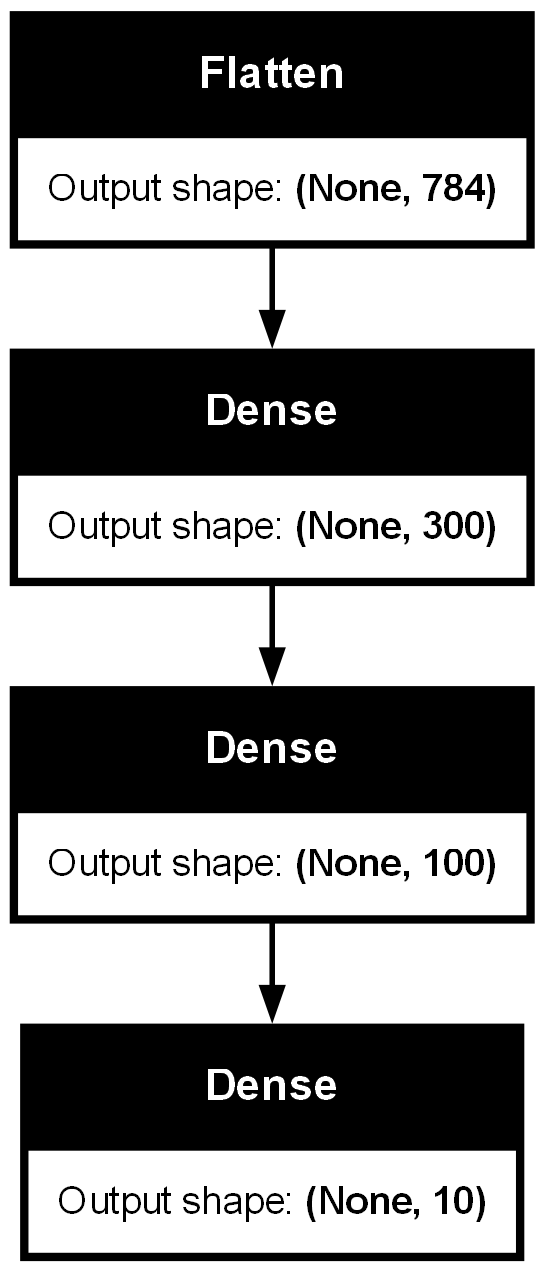

In [27]:
# another visualization of model
tf.keras.utils.plot_model(model, "Fashion_Mnist_Model.png", show_shapes=True)

In [28]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [29]:
hidden_1 = model.layers[1]

In [30]:
weights, bias = hidden_1.get_weights()
weights.shape

(784, 300)

In [31]:
bias.shape

(300,)

# Compiling


In [32]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]
)

In [33]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy],
)

# Training and evaluation


In [34]:
TRAIN1 = model.fit(X_train, Y_train, epochs=30, validation_data=(Xval, yval))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9642 - sparse_categorical_accuracy: 0.6895 - val_loss: 0.4959 - val_sparse_categorical_accuracy: 0.8290
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5019 - sparse_categorical_accuracy: 0.8272 - val_loss: 0.4465 - val_sparse_categorical_accuracy: 0.8406
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4465 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4252 - val_sparse_categorical_accuracy: 0.8476
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - loss: 0.4163 - sparse_categorical_accuracy: 0.8546 - val_loss: 0.4099 - val_sparse_categorical_accuracy: 0.8512
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3949 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.4001 - val_sparse_categorical_accuracy: 0.8518
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - loss: 0.3782 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.3905 - val_sparse_categorical_accur

In [35]:
TRAIN1.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

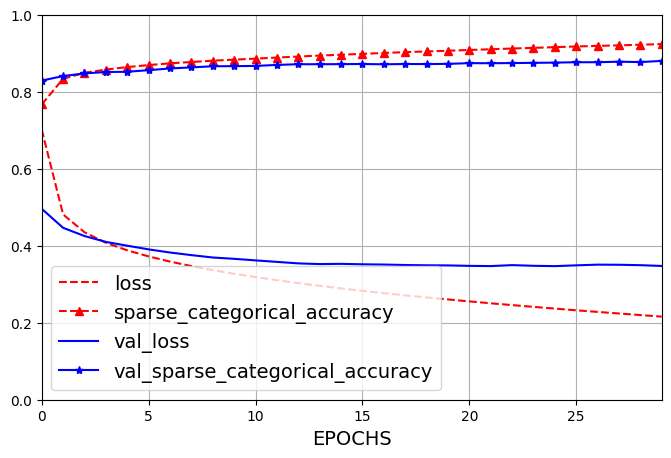

In [36]:
import pandas as pd

pd.DataFrame(TRAIN1.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="EPOCHS",
    style=["r--", "r--^", "b-", "b-*"],
)
plt.legend(loc="lower left")

# Building Regression MLP


In [37]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [38]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential(
    [
        norm_layer,
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 1.2631 - loss: 1.7201 - val_RootMeanSquaredError: 0.8437 - val_loss: 0.7116
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - RootMeanSquaredError: 0.6335 - loss: 0.4018 - val_RootMeanSquaredError: 0.8525 - val_loss: 0.7264
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - RootMeanSquaredError: 0.6050 - loss: 0.3663 - val_RootMeanSquaredError: 0.7976 - val_loss: 0.6359
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - RootMeanSquaredError: 0.5947 - loss: 0.3539 - val_RootMeanSquaredError: 1.3793 - val_loss: 1.9015
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - RootMeanSquaredError: 0.5863 - loss: 0.3439 - val_RootMeanSquaredError: 1.7145 - val_loss: 2.9382
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - RootMeanSquaredError: 0.5817 - loss: 0.3385 - val_RootMeanSquaredError: 0.8641 - val_loss: 0.7463
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - RootMeanSquaredError: 0.5700 - lo

In [39]:
rmse_test

0.5327805876731873

In [40]:
y_pred

array([[0.41268903],
       [1.0721557 ],
       [4.8945827 ]], dtype=float32)

# Complex Model


In [41]:
# Reseting the names again and setting seeds
tf.keras.utils.set_random_seed(42)
tf.keras.utils.clear_session()

In [42]:
# brick by brick
norma_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# now putting them together
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalised = norma_layer(input_)
hidden1 = hidden_layer1(normalised)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalised, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [43]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [44]:
optimiser = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimiser, metrics=["RootMeanSquaredError"])
norma_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.4098 - loss: 2.0932 - val_RootMeanSquaredError: 1.6913 - val_loss: 2.8593
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - RootMeanSquaredError: 0.7248 - loss: 0.5268 - val_RootMeanSquaredError: 0.7158 - val_loss: 0.5122
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - RootMeanSquaredError: 0.6491 - loss: 0.4218 - val_RootMeanSquaredError: 0.6359 - val_loss: 0.4043
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - RootMeanSquaredError: 0.6259 - loss: 0.3921 - val_RootMeanSquaredError: 0.6485 - val_loss: 0.4205
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - RootMeanSquaredError: 0.6128 - loss: 0.3758 - val_RootMeanSquaredError: 0.7600 - val_loss: 0.5774
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - RootMeanSquaredError: 0.6040 - loss: 0.3650 - val_RootMeanSquaredError: 0.6582 - val_loss: 0.4330
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - RootMeanSquaredError: 

In [45]:
# sending difefrent subsets through deep and wide paths
## using multiple inputs
### we want to send five features through the wide path(features 0 to 4)
#### six features through the deep path(features 2 to 7)
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norma_layer_wide = tf.keras.layers.Normalization()
norma_layer_deep = tf.keras.layers.Normalization()
normalised_wide = norma_layer_wide(input_wide)
normalised_deep = norma_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(normalised_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concated = tf.keras.layers.concatenate([normalised_wide, hidden2])
output = tf.keras.layers.Dense(1)(concated)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [46]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [47]:
optimiser = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimiser, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norma_layer_wide.adapt(X_train_wide)
norma_layer_deep.adapt(X_train_deep)
Segregated_model = model.fit(
    (X_train_wide, X_train_deep),
    y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
)

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.4394 - loss: 2.1709 - val_RootMeanSquaredError: 1.7355 - val_loss: 3.0105
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - RootMeanSquaredError: 0.7120 - loss: 0.5073 - val_RootMeanSquaredError: 1.0353 - val_loss: 1.0714
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - RootMeanSquaredError: 0.6594 - loss: 0.4349 - val_RootMeanSquaredError: 0.7308 - val_loss: 0.5339
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - RootMeanSquaredError: 0.6398 - loss: 0.4095 - val_RootMeanSquaredError: 0.6302 - val_loss: 0.3971
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - RootMeanSquaredError: 0.6285 - loss: 0.3952 - val_RootMeanSquaredError: 0.6017 - val_loss: 0.3619
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - RootMeanSquaredError: 0.6200 - loss: 0.3845 - val_RootMeanSquaredError: 0.5845 - val_loss: 0.3415
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - RootMeanSquaredError: 

In [48]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=("mse", "mse"),
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=["RootMeanSquaredError", "RootMeanSquaredError"],
)

In [50]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_8_RootMeanSquaredError: 1.8311 - dense_9_RootMeanSquaredError: 1.7913 - loss: 3.4993 - val_dense_8_RootMeanSquaredError: 0.7766 - val_dense_9_RootMeanSquaredError: 1.8701 - val_loss: 0.8922
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - dense_8_RootMeanSquaredError: 0.7487 - dense_9_RootMeanSquaredError: 0.9344 - loss: 0.5928 - val_dense_8_RootMeanSquaredError: 0.6810 - val_dense_9_RootMeanSquaredError: 1.0869 - val_loss: 0.5353
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - dense_8_RootMeanSquaredError: 0.6716 - dense_9_RootMeanSquaredError: 0.7818 - loss: 0.4672 - val_dense_8_RootMeanSquaredError: 0.6408 - val_dense_9_RootMeanSquaredError: 0.8964 - val_loss: 0.4498
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - dense_8_RootMeanSquaredError: 0.6499 - dense_9_RootMeanSquaredError: 0.7459 - loss: 0.4359 - val_dense_8_RootMeanSquaredError: 0.6790 - val_dense_9_RootMeanSquaredError: 0.7887 - val_loss: 0

In [51]:
eval_results = model.evaluate(
    (X_test_wide, X_test_deep), (y_test, y_test), return_dict=True
)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - dense_8_RootMeanSquaredError: 0.5851 - dense_9_RootMeanSquaredError: 0.6386 - loss: 0.3490


In [52]:
eval_results

{'dense_8_RootMeanSquaredError': 0.5824114680290222,
 'dense_9_RootMeanSquaredError': 0.6390661597251892,
 'loss': 0.3459005355834961}

In [53]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [54]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [55]:
y_pred

{'dense_8': array([[0.4716553],
        [1.3604686],
        [3.5444922]], dtype=float32),
 'dense_9': array([[0.53309286],
        [1.3347542 ],
        [3.3654711 ]], dtype=float32)}

# Subclassing API to Build Dynamic Models


In [56]:
tf.keras.backend.clear_session()

In [57]:
from tensorflow.keras.saving import register_keras_serializable


@register_keras_serializable()
class WideandDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [58]:
model = WideandDeepModel(30, "relu", name="My_model")

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss="mse",
    loss_weights=[0.9, 0.1],
    optimizer=optimizer,
    metrics=["RootMeanSquaredError", "RootMeanSquaredError"],
)
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 1.3655 - RootMeanSquaredError_1: 1.8010 - loss: 2.0890 - val_RootMeanSquaredError: 1.0487 - val_RootMeanSquaredError_1: 4.1729 - val_loss: 2.7299
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7228 - RootMeanSquaredError_1: 0.9666 - loss: 0.5644 - val_RootMeanSquaredError: 0.6628 - val_RootMeanSquaredError_1: 2.5686 - val_loss: 1.0547
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6614 - RootMeanSquaredError_1: 0.8244 - loss: 0.4619 - val_RootMeanSquaredError: 0.6219 - val_RootMeanSquaredError_1: 1.7085 - val_loss: 0.6398
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6438 - RootMeanSquaredError_1: 0.7607 - loss: 0.4311 - val_RootMeanSquaredError: 0.6062 - val_RootMeanSquaredError_1: 1.2318 - val_loss: 0.4823
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6331 - RootMeanSquaredError_1: 0.7

# Saving Model


In [60]:
model.save("My_keras_Model.keras")

In [61]:
# extra code – show the contents of the my_keras_model/ directory
from pathlib import Path

for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

In [62]:
model = tf.keras.models.load_model("my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [63]:
model.save_weights("my_weights.weights.h5")

In [64]:
model.load_weights("my_weights.weights.h5")

In [65]:
# extra code – show the list of my_weights.* files
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.weights.h5


# Using callbacks


In [66]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoints.weights.h5", save_weights_only=True
)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb],
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 0.5978 - RootMeanSquaredError_1: 0.6576 - loss: 0.3649 - val_RootMeanSquaredError: 0.8573 - val_RootMeanSquaredError_1: 0.6452 - val_loss: 0.7028
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5951 - RootMeanSquaredError_1: 0.6549 - loss: 0.3617 - val_RootMeanSquaredError: 1.0784 - val_RootMeanSquaredError_1: 0.7166 - val_loss: 1.0976
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - RootMeanSquaredError: 0.5943 - RootMeanSquaredError_1: 0.6489 - loss: 0.3601 - val_RootMeanSquaredError: 1.2416 - val_RootMeanSquaredError_1: 0.6373 - val_loss: 1.4275
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5897 - RootMeanSquaredError_1: 0.6456 - loss: 0.3547 - val_RootMeanSquaredError: 1.5151 - val_RootMeanSquaredError_1: 1.4800 - val_loss: 2.2838
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - RootMeanSquaredError: 0.5902 - RootMeanSquaredError_1:

In [67]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5734 - RootMeanSquaredError_1: 0.6217 - loss: 0.3346 - val_RootMeanSquaredError: 0.7888 - val_RootMeanSquaredError_1: 0.6886 - val_loss: 0.6072
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - RootMeanSquaredError: 0.5717 - RootMeanSquaredError_1: 0.6202 - loss: 0.3326 - val_RootMeanSquaredError: 1.1274 - val_RootMeanSquaredError_1: 1.3695 - val_loss: 1.3308
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - RootMeanSquaredError: 0.5718 - RootMeanSquaredError_1: 0.6209 - loss: 0.3329 - val_RootMeanSquaredError: 1.1097 - val_RootMeanSquaredError_1: 0.9958 - val_loss: 1.2069
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - RootMeanSquaredError: 0.5718 - RootMeanSquaredError_1: 0.6187 - loss: 0.3326 - val_RootMeanSquaredError: 1.2292 - val_RootMeanSquaredError_1: 0.9829 - val_loss: 1.4559
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - RootMeanSquaredError: 0.5707 - RootMeanSquare

In [68]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [69]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb],
    verbose=0,
)

Epoch=0, val/train=1.12
Epoch=1, val/train=1.06
Epoch=2, val/train=1.63
Epoch=3, val/train=1.17
Epoch=4, val/train=1.89
Epoch=5, val/train=1.26
Epoch=6, val/train=1.91
Epoch=7, val/train=1.18
Epoch=8, val/train=1.28
Epoch=9, val/train=0.99


# Using Tensorboard for Visualisation


In [70]:
import shutil

shutil.rmtree("logs", ignore_errors=True)

In [71]:
from pathlib import Path
from time import strftime


def get_run_logdir(root_logdir="logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")


run_logdir = get_run_logdir()

In [72]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential(
    [
        norm_layer,
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)

In [73]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb],
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.7455 - loss: 3.1639 - val_RootMeanSquaredError: 0.8035 - val_loss: 0.6455
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - RootMeanSquaredError: 0.7789 - loss: 0.6074 - val_RootMeanSquaredError: 0.7577 - val_loss: 0.5739
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - RootMeanSquaredError: 0.7403 - loss: 0.5487 - val_RootMeanSquaredError: 0.7230 - val_loss: 0.5226
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - RootMeanSquaredError: 0.7210 - loss: 0.5205 - val_RootMeanSquaredError: 0.6986 - val_loss: 0.4878
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - RootMeanSquaredError: 0.7064 - loss: 0.4995 - val_RootMeanSquaredError: 0.6811 - val_loss: 0.4638
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - RootMeanSquaredError: 0.6949 - loss: 0.4834 - val_RootMeanSquaredError: 0.6679 - val_loss: 0.4460
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - RootMeanSquaredError: 

In [74]:
print("logs")
for path in sorted(Path("logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

logs
  run_2024_09_19_05_27_53
    plugins
      profile
        2024_09_18_23_57_54
          MSI.xplane.pb
    train
      events.out.tfevents.1726703874.MSI.5408.0.v2
    validation
      events.out.tfevents.1726703875.MSI.5408.1.v2


In [76]:
%tensorboard --logdir=my_logs --verbosity 1



UsageError: Line magic function `%tensorboard` not found.


In [77]:
%pip show tensorboard
%pip show tensorflow


Name: tensorboard
Version: 2.17.1
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: absl-py, grpcio, markdown, numpy, packaging, protobuf, setuptools, six, tensorboard-data-server, werkzeug
Required-by: tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


Name: tensorflow
Version: 2.16.0rc0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [78]:
%mkdir new_logs


In [81]:
%load_ext tensorboard
%tensorboard --logdir=new_logs


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-09-19 05:29:20.437196: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 05:29:21.168471: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\whate\AppData\Local\Programs\Python\Python312\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "C:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packag

In [84]:
%tensorboard --logdir=my_logs --bind_all --load_fast=false 


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-09-19 05:30:05.075164: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 05:30:05.783608: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\whate\AppData\Local\Programs\Python\Python312\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "C:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packag

In [93]:
%tensorboard --logdir Chapter9

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-09-19 05:34:08.016796: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 05:34:08.718134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\whate\AppData\Local\Programs\Python\Python312\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "C:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packag